In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import validation_curve

In [2]:
# load the data
df = pd.read_csv('./Data/Final_18_features_extracted_V2.csv')

In [3]:
X = df.drop(columns=["Region","File Name"],axis=1)
y = df['Region']

In [4]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=17,shuffle=True
)

In [5]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=17)
gbt = GradientBoostingClassifier(random_state=17)

In [6]:
# A helper function to plot
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

In [7]:
def plot_validation_curve(param_grid,param,estimator):
    val_train, val_test = validation_curve(
    estimator=estimator,
    X=X_train,
    y=y_train,
    param_name=param,
    param_range=param_grid,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1
    )

    plot_with_err(param_grid, val_train, label="training scores")
    plot_with_err(param_grid, val_test, label="validation scores")
    plt.xlabel(param)
    plt.ylabel("accuracy")
    plt.legend()
    plt.grid(True);

- learning_rate

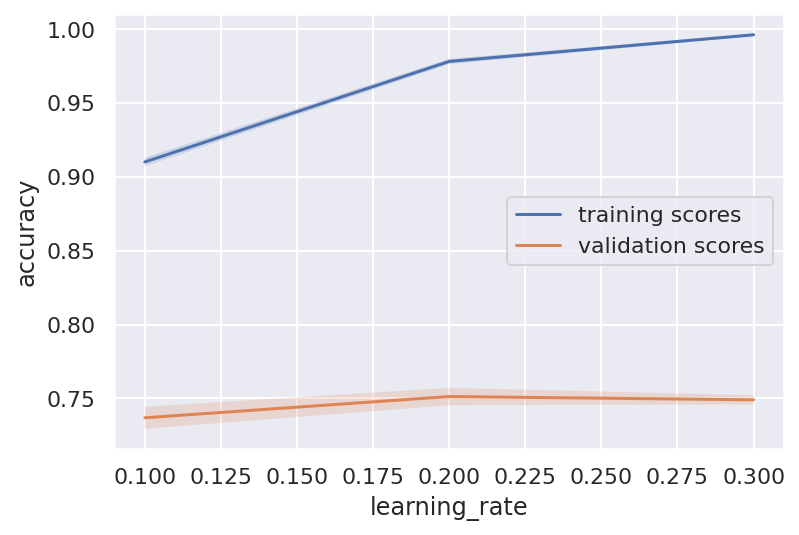

In [8]:
plot_validation_curve([0.1,0.2,0.3],'learning_rate',gbt)

- seems like lower learning rate is better for variance reduction

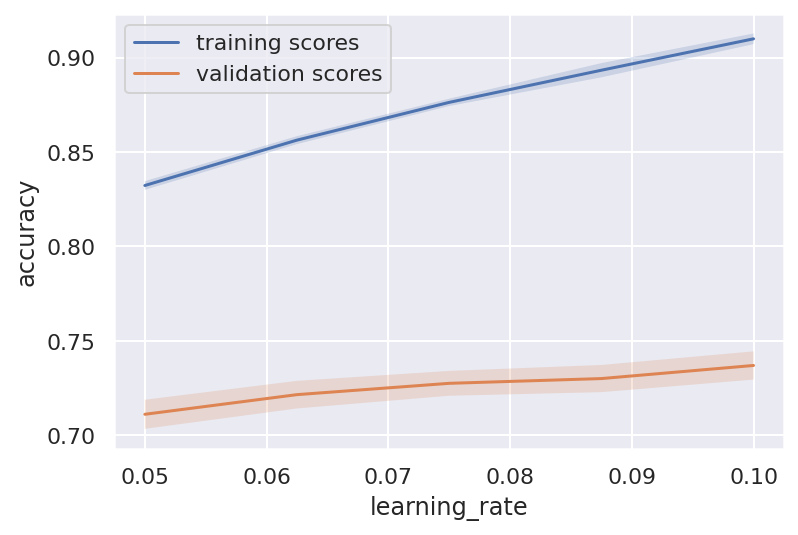

In [9]:
plot_validation_curve(np.linspace(0.05,0.1,5),'learning_rate',gbt)

- seems like 0.1 is the best value

- n_estimators

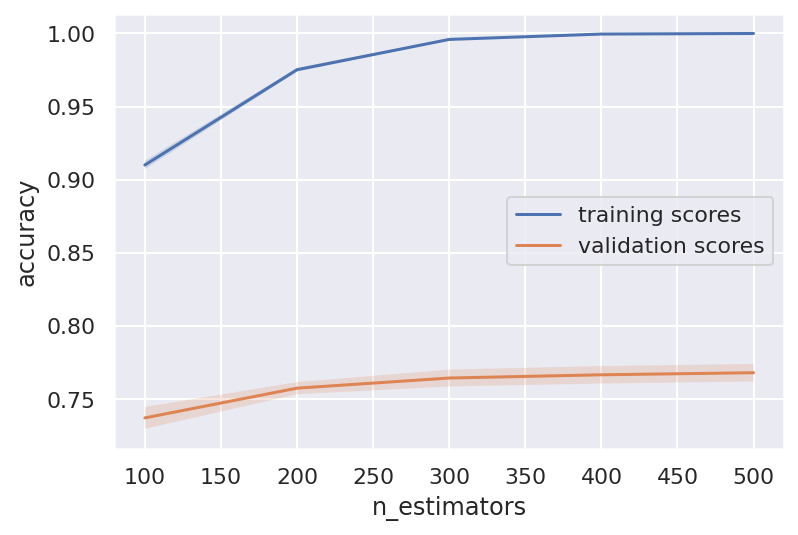

In [11]:
gbt = GradientBoostingClassifier(learning_rate=0.1,random_state=17)
plot_validation_curve([100,200,300,400,500],'n_estimators',gbt)